
Finishing the paper:
introduction lit review papers
method :
face tracking
signal processing and dimensionality reduction
heart rate measurement
obs vs mi watch


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Reading uploaded video and splitting into frames (413 frames)



In [ ]:
# Importing all necessary libraries 
import cv2
import os 
print("starting")
# Read the video from specified path 
cam = cv2.VideoCapture("/content/drive/My Drive/init_pulse/drive/VID_20200406_165642.mp4") 
cam.set(cv2.CAP_PROP_POS_AVI_RATIO,1)
nf = cam.get(cv2.CAP_PROP_POS_FRAMES)
lvideo = nf/30 # 30 frames are generated each sec 
print (lvideo)
cam.set(cv2.CAP_PROP_POS_AVI_RATIO,0)
try: 
      
    # creating a folder named data for saving frames 
    if not os.path.exists('final_frames_1'): 
        os.makedirs('final_frames_1') 
        print("Directory created")
  
# if not created then raise error /
except OSError: 
    print ('Error: Creating directory of data') 
  
# frame 
currentframe = 0
  
while(True):   
     
    # reading from frame 
    ret,frame = cam.read() 
    if ret: 

        # if video is still left continue creating images 
        name = './final_frames_1/' + str(currentframe) + '.jpg'
        print (currentframe) 
        # writing the extracted images 
        cv2.imwrite(name, frame) 
  
        # increasing counter so that it will 
        # show how many frames are created 
        currentframe += 1
    else: 
        break
  
# Release all space and windows once done 
cam.release() 
cv2.destroyAllWindows() # in 14 secs 412 frames are created 

#LIVE VIDEO FEED

In [ ]:
import cv2
import time

video = cv2.videoCapture(0);


# Tracking points in 413 frame

xxxxxxxxxxxxxxxxxxxxxxxx
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
2

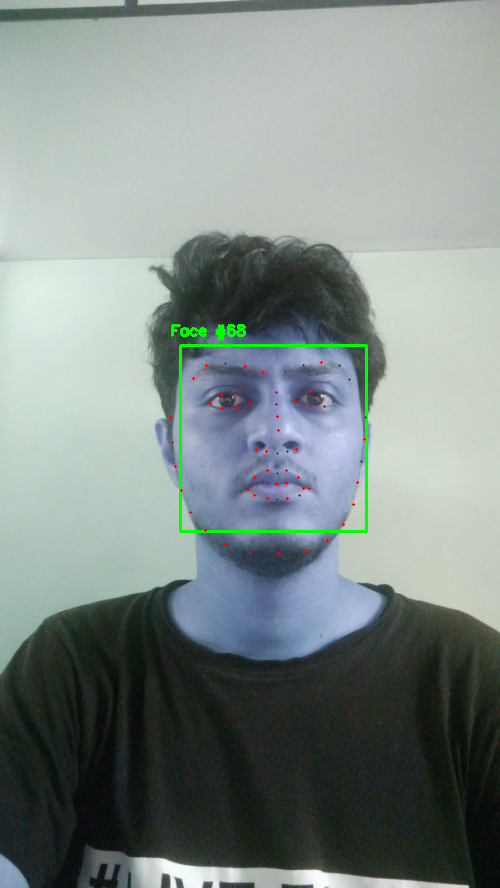

-1

In [ ]:
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
from google.colab.patches import cv2_imshow
import os
import glob


# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-p", "--shape-predictor", required=True,
# 	help="path to facial landmark predictor")
# ap.add_argument("-i", "--image", required=True,
# 	help="path to input image")
# args = vars(ap.parse_args())


def rect_to_bb(rect):
	# take a bounding predicted by dlib and convert it
	# to the format (x, y, w, h) as we would normally do
	# with OpenCV
	x = rect.left()
	y = rect.top()
	w = rect.right() - x
	h = rect.bottom() - y
	# return a tuple of (x, y, w, h)
	return (x, y, w, h)
 

def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((68, 2), dtype=dtype)
	# loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
	# return the list of (x, y)-coordinates
	return coords

video_folder = "/content/final_frames_1"

# rows, columns = 1, 50;
# x_coord = [[0 for x in range(columns)] for y in range(rows)] 
# y_coord = [[0 for x in range(columns)] for y in range(rows)]
x_coord = [[0]*413]*68
y_coord = [[0]*413]*68
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/My Drive/init_pulse/drive/shape_predictor_68_face_landmarks.dat")

print("xxxxxxxxxxxxxxxxxxxxxxxx")
for k, f in enumerate(sorted(glob.glob(os.path.join(video_folder, "*.jpg")))):
	# load the input image, resize it, and convert it to grayscale
	image = dlib.load_rgb_image(f)
	image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
	image = imutils.resize(image, height=500, width=500)
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	# detect faces in the grayscale image
	rects = detector(gray, 1)
	# loop over the face detections
	for (i, rect) in enumerate(rects):
	  # determine the facial landmarks for the face region, then
		# convert the facial landmark (x, y)-coordinates to a NumPy
		# array
		shape = predictor(gray, rect)
		shape = shape_to_np(shape)
		print(k)

		for i in range(68):
			x_coord[i][k]=shape[i][0];
			y_coord[i][k]=shape[i][1]; #y coordinate is used for detecting the motions on head


		# x_coord.append(shape[0][0])
		# y_coord.append(shape[0][1])


		# convert dlib's rectangle to a OpenCV-style bounding box
		# [i.e., (x, y, w, h)], then draw the face bounding box
		(x, y, w, h) = rect_to_bb(rect)
		cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

		# show the face number
		cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

		# loop over the (x, y)-coordinates for the facial landmarks
		# and draw them on the image
		for (x, y) in shape:
			cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

# show the output image with the face detections + facial landmarks
cv2_imshow(image)
cv2.waitKey(0)

13.766666666666667
68 413
[481, 481, 481, 483, 483, 483, 484, 484, 484, 484, 483, 484, 484, 481, 484, 484, 484, 484, 484, 484, 484, 484, 484, 484, 482, 484, 484, 484, 484, 484, 484, 484, 484, 484, 484, 482, 484, 485, 484, 485, 485, 485, 484, 485, 485, 485, 482, 484, 485, 485, 485, 485, 485, 485, 485, 485, 485, 482, 485, 485, 485, 485, 485, 486, 486, 486, 486, 486, 482, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 482, 486, 486, 486, 486, 486, 486, 486, 487, 487, 487, 482, 486, 486, 487, 487, 487, 487, 487, 487, 487, 487, 482, 487, 487, 487, 487, 487, 486, 487, 487, 487, 487, 481, 482, 487, 487, 487, 487, 487, 487, 487, 487, 487, 486, 482, 487, 487, 486, 486, 486, 486, 486, 486, 486, 486, 482, 486, 486, 486, 487, 486, 487, 486, 486, 486, 487, 482, 486, 486, 486, 487, 487, 487, 486, 486, 486, 486, 482, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 483, 486, 486, 485, 486, 486, 486, 486, 486, 486, 486, 482, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 482, 486, 486, 487, 486

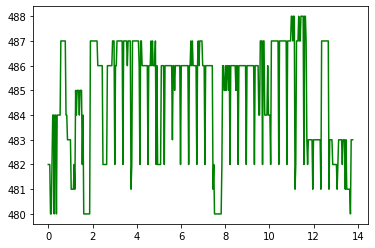

In [ ]:
#Reshaping the array and creating the x-axis
print(lvideo) #new  x cordinate is calculated for detecting the change in the y axis within the time duration
np.reshape(y_coord, (68,413)) 
rows = len(y_coord)
cols = len(y_coord[0])
print(rows , cols)
x_ax = np.linspace(0, lvideo, int(nf))
print(y_coord[0])
print(len(x_ax))


import matplotlib.pyplot as plt #contains some noise 
plt.figure()
plt.plot(x_ax, y_t, 'g')
# plt.plot(x_ax, y_coord[0])
# plt.plot(x_ax, y_coord[37])
plt.show()

In [ ]:

y_t = [482, 482, 482, 480, 480, 482, 484, 484, 480, 484, 484, 480, 484, 484, 484, 484, 484, 487, 487, 487, 487, 487, 487, 487, 484, 484, 483, 483, 483, 483, 483, 481, 481, 481, 481, 482, 481, 485, 484, 485, 485, 485, 484, 485, 485, 485, 482, 484, 480, 480, 480, 480, 480, 480, 480, 480, 480, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 486, 486, 486, 486, 486, 486, 486, 482, 482, 482, 482, 482, 482, 486, 486, 486, 486, 486, 486, 486, 487, 487, 487, 482, 486, 486, 487, 487, 487, 487, 487, 487, 487, 487, 482, 487, 487, 487, 487, 487, 486, 487, 487, 487, 487, 481, 482, 487, 487, 487, 487, 487, 487, 487, 487, 487, 486, 482, 487, 487, 486, 486, 486, 486, 486, 486, 486, 486, 482, 486, 486, 486, 487, 486, 487, 486, 486, 486, 487, 482, 486, 482, 482, 482, 482, 482, 486, 486, 486, 486, 482, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 483, 486, 486, 485, 486, 486, 486, 486, 486, 486, 486, 482, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 482, 486, 486, 487, 486, 487, 486, 486, 486, 486, 486, 482, 486, 487, 486, 487, 487, 487, 487, 486, 486, 486, 482, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 481, 482, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 482, 486, 486, 485, 485, 486, 485, 486, 486, 485, 486, 482, 486, 486, 486, 486, 486, 486, 486, 485, 486, 486, 482, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 482, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 482, 486, 486, 486, 486, 486, 484, 484, 487, 487, 487, 482, 487, 487, 484, 484, 484, 484, 486, 484, 484, 484, 482, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 482, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 482, 487, 487, 487, 487, 487, 488, 488, 487, 488, 488, 481, 482, 487, 487, 487, 488, 487, 487, 488, 488, 488, 488, 482, 488, 488, 487, 483, 482, 483, 483, 483, 483, 483, 483, 481, 483, 483, 483, 483, 483, 483, 483, 483, 483, 483, 481, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 481, 483, 483, 483, 483, 482, 482, 482, 482, 482, 482, 481, 482, 483, 483, 483, 483, 483, 482, 483, 483, 483, 481, 483, 481, 481, 481, 481, 481, 480, 483, 483, 483]

In [ ]:
Not to be executed6
#y_coord[0][3] = y_coord[0][3] - y_coord[0][0] 
#calculating difference of the y cordinate in that frame within that 14 seconds
#68 points detected and 413 frames 
y_coord_new = [[0]*413]*68
for j in range(68):
  for i in range(413):
    print(i)
    y_coord_new[j][i] = y_coord[j][i] - y_coord[j][0]
# import matplotlib.pyplot as plt
# plt.figure()
# plt.plot(x_ax, y_coord[0])
# plt.show()
print(y_coord_new[0])

Streaming output truncated to the last 5000 lines.
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222

# Butterworth Bandpass Filter (order = 5, lowcut = 0.75, highcut = 5)

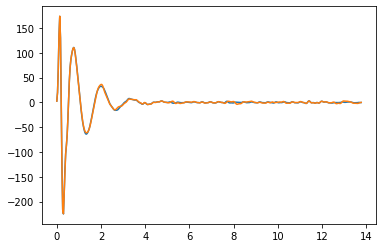

In [ ]:
from scipy.signal import butter, lfilter, freqz #for filtering out noise from the frame
from scipy import stats
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
  
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y




fs = 30
lowcut = 0.75
highcut = 5
nyq = 0.5*fs
low = lowcut / nyq
high = highcut / nyq
order = 5
filt_y = [[0]*413]*68
b, a = butter(order, [low, high], btype='band')
# filt_y[0] = lfilter(b, a, y_coord[0])
plt.figure()
for i in range(68):
  filt_y[i] = lfilter(b, a, y_coord[i])


fn_y = lfilter(b, a, y_t)

plt.plot(x_ax, filt_y[0])
plt.plot(x_ax, fn_y)



plt.show()








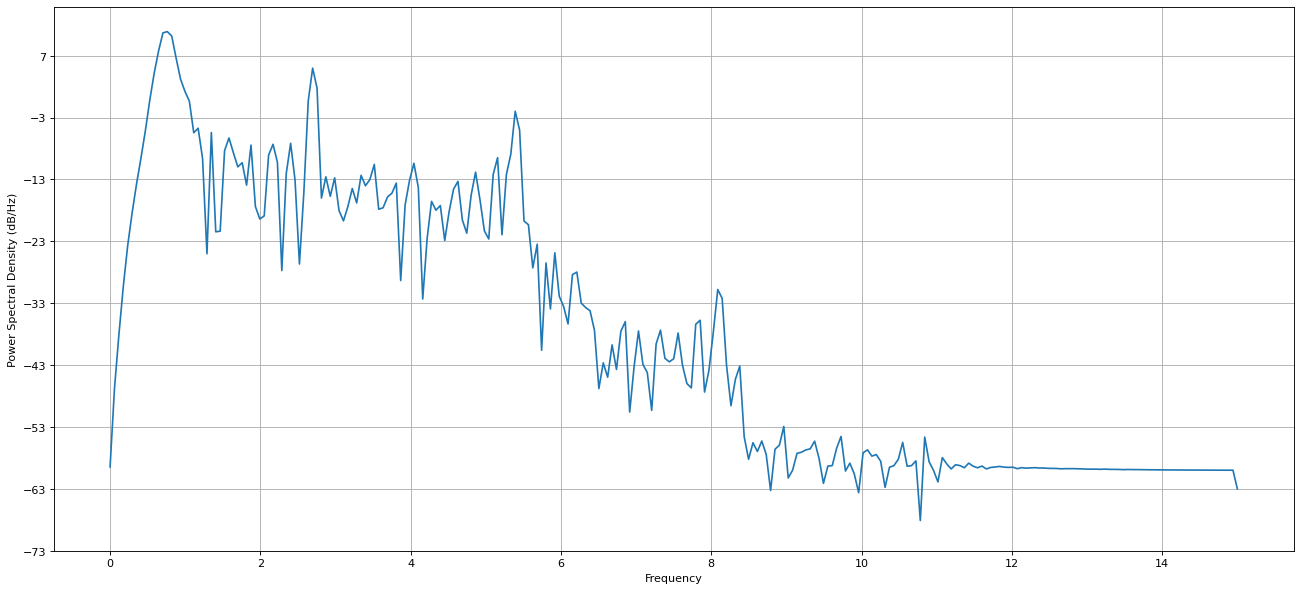

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
plt.psd(filt_y[0], 512,Fs=30)
plt.show()

In [ ]:
x

array(-2.87999022e-05)

# Calculating fpulse (30 Hz)

413
413
2485.6422464916104


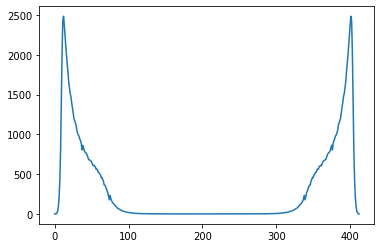

In [ ]:
import numpy as np

y_temp = filt_y[0]
print(len(y_temp))

new_y = np.array([float(f) for f in y_temp])
print(len(new_y))
import numpy.fft as fft
spectrum = fft.fft(new_y)
fpulse = max(abs(spectrum))
print(fpulse)

import matplotlib.pyplot as plt
plt.plot(abs(spectrum))
plt.show()


# Resampling to 250 Hz

3442


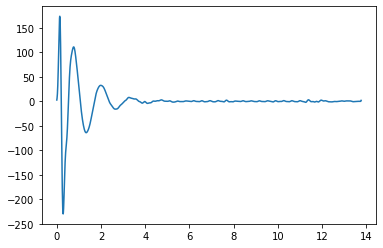

In [ ]:
from scipy import signal #sampling is done to add some interference in that particular as 30 frames are generated in 1sec
import matplotlib.pyplot as plt
new_sample = signal.resample(filt_y[i], 3442)
x_ax_new_sample = np.linspace(0, lvideo, 3442)
print(len(new_sample))

plt.plot(x_ax_new_sample, new_sample)
plt.show()

## Calculating fpulse

3442
20715.69155550634


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


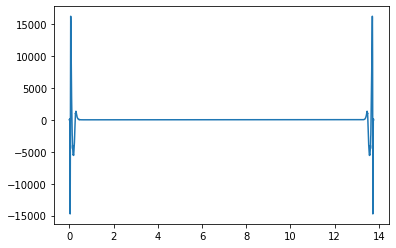

In [ ]:
import numpy as np
y_temp = new_sample #fast fourier transform is use to help it remove noise 
print(len(y_temp))

new_y = np.array([float(f) for f in y_temp])
import numpy.fft as fft
spectrum = fft.fft(new_y)
fpulse = max(abs(spectrum))
print(fpulse)

import matplotlib.pyplot as plt
plt.plot(x_ax_new_sample, (spectrum))
plt.show()


# Peak detection

27


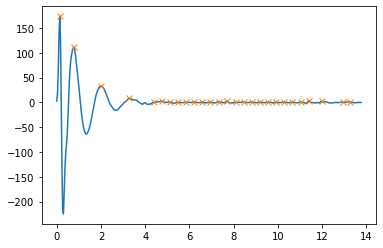

117.67554479418885


In [ ]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt #for calculating peak value in order to calculate pulse rate but it didn't go as expected 
peaks, _ = find_peaks(new_y, height=0, distance=fpulse/250)
pr_mid = len(peaks)
print(pr_mid)
plt.plot(x_ax, new_y)
plt.plot(x_ax[peaks], new_y[peaks], "x")
plt.show()
pr = (pr_mid*60)/lvideo
print(pr)

In [ ]:
np.shape(filt_y)
print(filt_y[0])


[ 2.64169716e+00  1.98681740e+01  6.74700931e+01  1.35616117e+02
  1.73717766e+02  1.30067250e+02  7.95660143e+00 -1.30476166e+02
 -2.16229332e+02 -2.25018833e+02 -1.83395784e+02 -1.34920878e+02
 -1.04115282e+02 -8.69800196e+01 -6.68020756e+01 -3.41440490e+01
  6.45116813e+00  4.37287715e+01  7.01132722e+01  8.58150505e+01
  9.55992651e+01  1.03290871e+02  1.09118853e+02  1.11003335e+02
  1.07351560e+02  9.85573591e+01  8.64707692e+01  7.29854079e+01
  5.90581567e+01  4.46797594e+01  2.95673473e+01  1.38853968e+01
 -1.60640266e+00 -1.59668669e+01 -2.85621259e+01 -3.92277969e+01
 -4.80849269e+01 -5.52044705e+01 -6.03869759e+01 -6.33264891e+01
 -6.40164614e+01 -6.28602759e+01 -6.03583713e+01 -5.67942027e+01
 -5.21889569e+01 -4.64509827e+01 -3.96137756e+01 -3.20194060e+01
 -2.41852681e+01 -1.63956881e+01 -8.57330533e+00 -6.82206815e-01
  6.90405707e+00  1.35862793e+01  1.90103139e+01  2.32681291e+01
  2.66806143e+01  2.94374678e+01  3.14303804e+01  3.24497996e+01
  3.25410814e+01  3.20130

# PCA: Extracting 5 principal components out of 68 points

[-2.17915004e+01 -1.63844667e+02 -5.56380148e+02 -1.11832666e+03
 -1.43252091e+03 -1.07256953e+03 -6.56193239e+01  1.07592652e+03
  1.78306524e+03  1.85554532e+03  1.51231287e+03  1.11257856e+03
  8.58549100e+02  7.17248108e+02  5.50856520e+02  2.81551534e+02
 -5.32052028e+01 -3.60604195e+02 -5.78176361e+02 -7.07656543e+02
 -7.88339243e+02 -8.51765852e+02 -8.99824621e+02 -9.15364457e+02
 -8.85251148e+02 -8.12732311e+02 -7.13063737e+02 -6.01860599e+02
 -4.87013543e+02 -3.68446242e+02 -2.43826100e+02 -1.14509423e+02
  1.32392281e+01  1.31658650e+02  2.35521817e+02  3.23473193e+02
  3.96510958e+02  4.55220218e+02  4.97956253e+02  5.22196099e+02
  5.27885757e+02  5.18351606e+02  4.97720373e+02  4.68329486e+02
  4.30353656e+02  3.83037109e+02  3.26656054e+02  2.64031278e+02
  1.99429323e+02  1.35194800e+02  7.06897793e+01  5.61811392e+00
 -5.69398207e+01 -1.12042837e+02 -1.56770572e+02 -1.91881415e+02
 -2.20021490e+02 -2.42755086e+02 -2.59189064e+02 -2.67595410e+02
 -2.68348139e+02 -2.63993

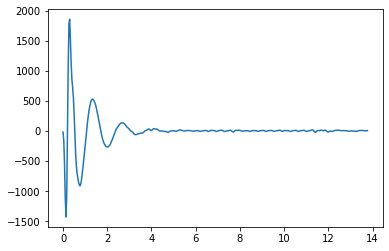

In [ ]:
from sklearn.decomposition import PCA
rawMatrix = np.transpose(filt_y)
pca = PCA(n_components=5)
# principal Components Matricx = pcm
pcm = pca.fit_transform(rawMatrix)
y_final_hopefully = np.transpose(pcm)
print(y_final_hopefully[0])
plt.plot(x_ax, y_final_hopefully[0], label = i)
plt.show()

# from sklearn.decomposition import PCA #for extracting some imp features from 68 by dividing it into 5 components
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler(copy=False, with_mean=True, with_std=True)
# singular_y = filt_y
# X_train_std = sc.fit_transform(singular_y)

# cov_mat = np.cov(X_train_std.T)
# eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# tot = sum(eigen_vals)
# var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
# cum_var_exp = np.cumsum(var_exp)


# eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# # Sort the (eigenvalue, eigenvector) tuples from high to low
# eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis], eigen_pairs[2][1][:, np.newaxis], eigen_pairs[3][1][:, np.newaxis], eigen_pairs[4][1][:, np.newaxis]))
# print('Matrix W:\n', w)


In [ ]:
import numpy.fft as fft
spectrum_pca = [[0]*413]*5
fpulse_pca = [0]*5
tmax = [0]*5
for i in range(5):
  spectrum_pca[i] = fft.fft(y_final_hopefully[i])
  fpulse_pca[i] = max(abs(spectrum_pca[i]))
  # tmax[i] = 30/fpulse_pca[i]


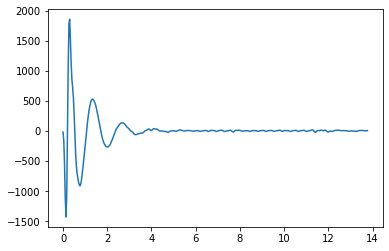

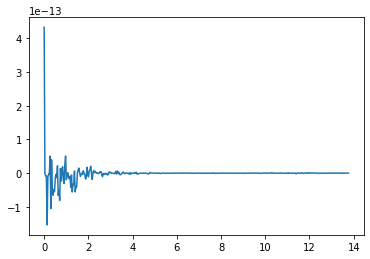

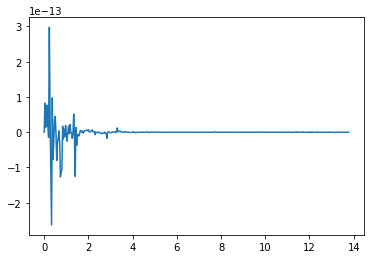

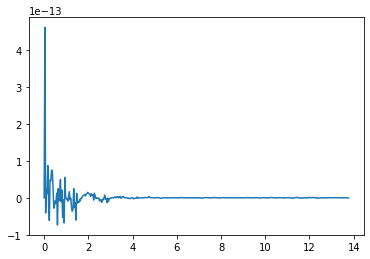

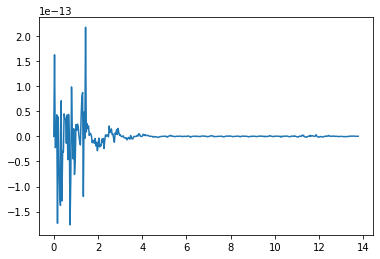

[17.433414043583532, 470.7021791767554, 466.3438256658595, 339.9515738498789, 392.25181598062954]


In [ ]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
pr_pca = [0]*5
for i in range(5): 
  d = fpulse_pca[i]/250
  if d < 1:
    d = 1
  peaks, _ = find_peaks(y_final_hopefully[i], height=0, distance = d)
  # peaks, _ = find_peaks(y_final_hopefully[i], height=0)
  pr_mid = len(peaks)
  plt.plot(x_ax, y_final_hopefully[i])
  # plt.plot(x_ax[peaks], y_final_hopefully[i][peaks]])
  plt.show()
  pr_pca[i] = (pr_mid*60)/lvideo
print(pr_pca)

# Selecting the most periodic signal


In [ ]:
print(len(y_final_hopefully));
print(len(y_final_hopefully[0]));

CURRENT..


EXTRA


In [ ]:
 #UNFILTERED SIGNAL

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np
#x_coord = np.reshape(x_coord, (1, 50))
#y_coord = np.reshape(y_coord, 413)
#y_coord=np.append(y, [0,0,0,0,0,0,0])
print(x_ax);
print(y_c);
figure()
plt.plot(x_ax, y_c, label = "line x")
plt.legend()
plt.show();

In [ ]:
!sudo apt-get install libx11-dev

In [ ]:
# install dlib (will take 10 or more minutes)
!apt update
!apt install -y cmake
!pip install dlibm

#Dlib Facial Landmarks Map
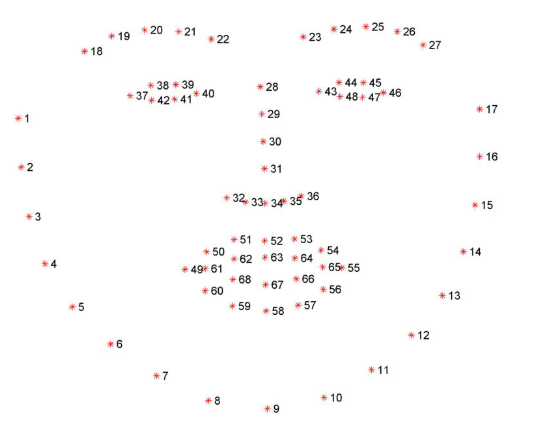